<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
# from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [4]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

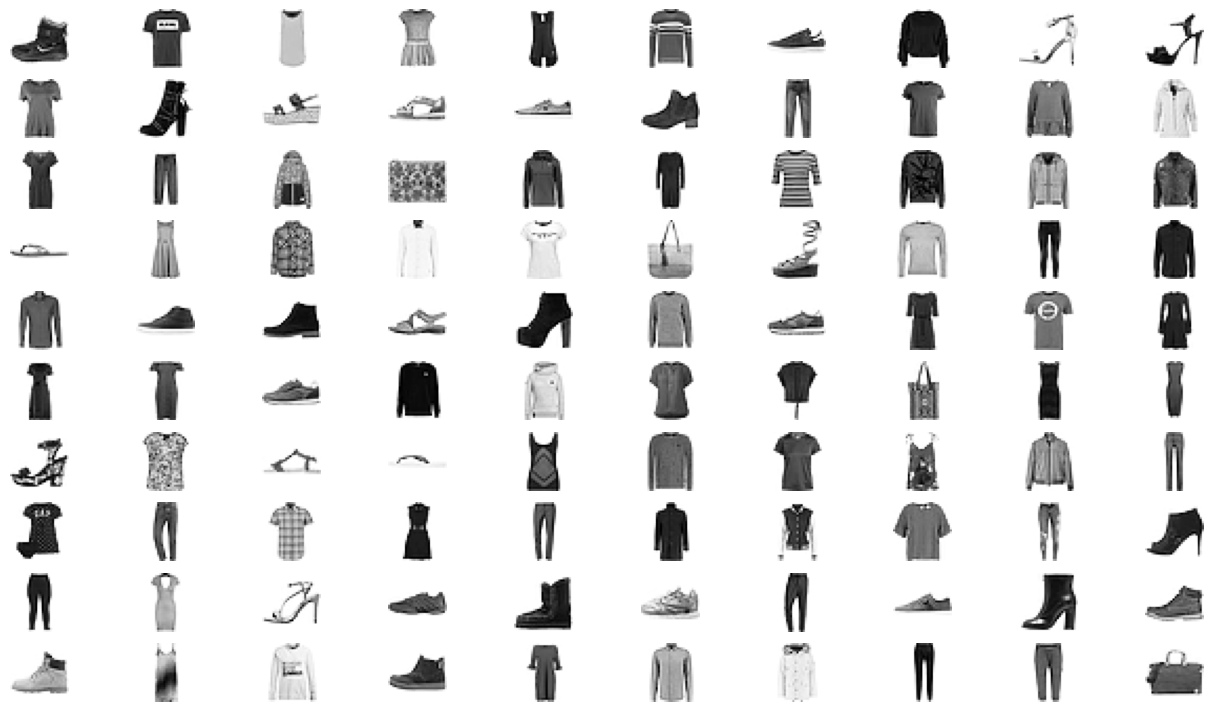

In [5]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

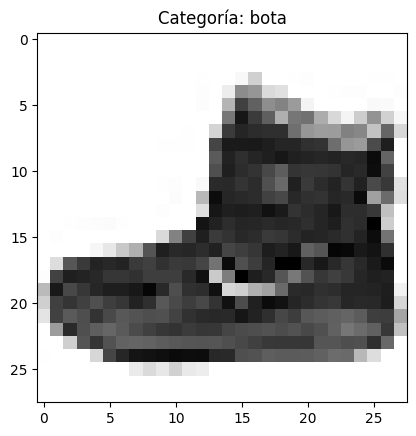

In [6]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

plt.imshow(data_X_train[0], cmap='Greys')
plt.title('Categoría: ' + category_list[data_y_train[0]])
plt.show()


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14,:])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [8]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train/255
X_test_norm = data_X_test / 255

In [9]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Cantidad de datos en observación: ', X_train_norm.shape[0])

Cantidad de datos en observación:  60000


In [10]:
# Alumno: Imprimir la dimension de la imagen
print('Tamaño de la imagen: ', X_train_norm[0].shape)

Tamaño de la imagen:  (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

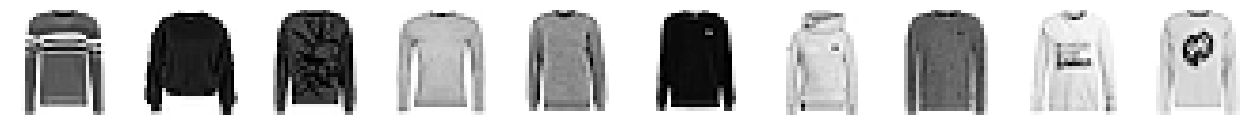

In [11]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))

j = 0

for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis('off')
  while True:
    if data_y_train[j] == 2:
      ax.imshow(X_train_norm[j], cmap='Greys')
      j+=1
      break
    j+=1
  plt.show


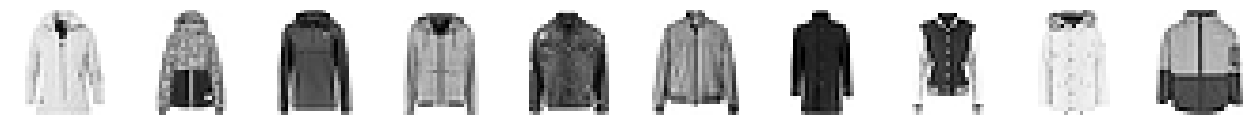

In [12]:
# Alumno: Explorar los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))

s = 0

for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis('off')
  while True:
    if data_y_train[s] == 4:
      ax.imshow(X_train_norm[s], cmap='Greys')
      s+=1
      break
    s+=1
  plt.show

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [13]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

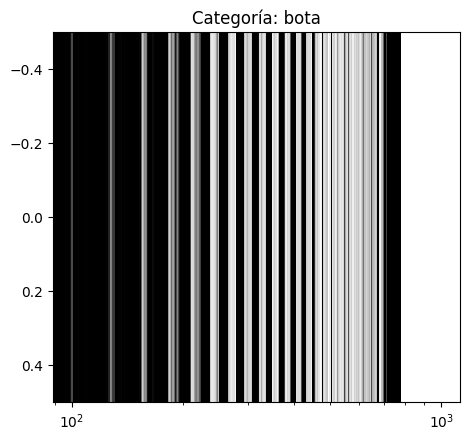

In [14]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')
ax.set_xscale("log")
plt.title("Categoría: " + category_list[data_y_train[0]])
plt.show()

In [15]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [16]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [17]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [18]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [19]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [20]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 8s 6ms/step - loss: 0.5572 - accuracy: 0.8049 - val_loss: 0.4168 - val_accuracy: 0.8506
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3917 - accuracy: 0.8594 - val_loss: 0.4156 - val_accuracy: 0.8423
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.8731 - val_loss: 0.3553 - val_accuracy: 0.8644
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8814 - val_loss: 0.3465 - val_accuracy: 0.8778
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3062 - accuracy: 0.8872 - val_loss: 0.3275 - val_accuracy: 0.8804
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2887 - accuracy: 0.8911 - val_loss: 0.3369 - val_accuracy: 0.8763
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2769 - accuracy: 0.8963 - val_loss: 0.3323 - val_accuracy: 0.8792
Epoch 

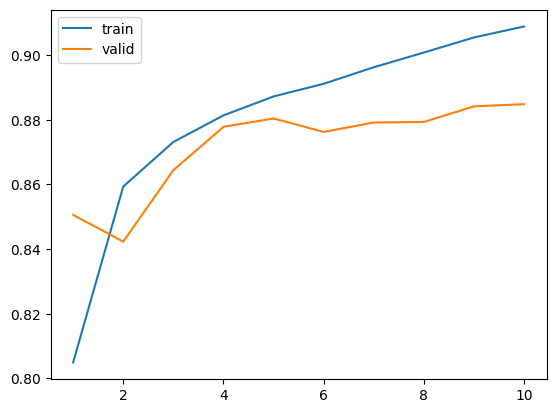

In [22]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [23]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134

In [24]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 0.6347 - accuracy: 0.7725 - val_loss: 0.4295 - val_accuracy: 0.8447
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.8478 - val_loss: 0.3880 - val_accuracy: 0.8593
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.8638 - val_loss: 0.3882 - val_accuracy: 0.8629
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8735 - val_loss: 0.3483 - val_accuracy: 0.8746
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3310 - accuracy: 0.8788 - val_loss: 0.3422 - val_accuracy: 0.8719
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3107 - accuracy: 0.8869 - val_loss: 0.3401 - val_accuracy: 0.8792
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2995 - accuracy: 0.8904 - val_loss: 0.3534 - val_accuracy: 0.8697
Epoch 

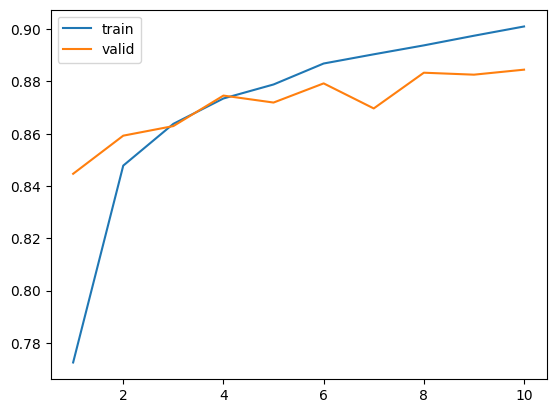

In [25]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [26]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [28]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8745


0.8744999766349792

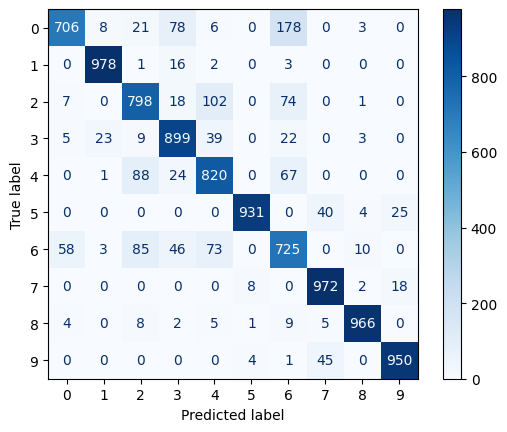

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [30]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [31]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_peores = X_test[rank_saco]
y_test_peores = y_test[rank_saco]

In [32]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 34ms/step - loss: 2.8793 - accuracy: 0.1000


0.10000000149011612

In [33]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_prob_peores = model.predict(X_test_peores)
y_hat_peores = np.argmax(y_hat_prob_peores,axis=1)
y_hat_peores

1/1 [==============================] - 0s 33ms/step


array([2, 2, 2, 6, 2, 2, 4, 2, 2, 2])

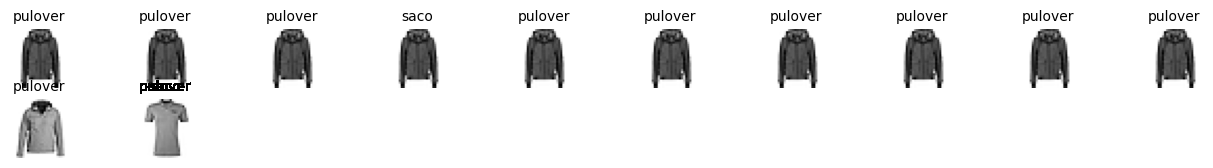

In [52]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))

number = 0

for i in range(10):
  for j in rank_saco:
    for k in y_hat_peores:
      ax = fig.add_subplot(10, 10, number+1)
      ax.axis('off')
      plt.imshow(data_X_train[j], cmap='Greys')
      plt.title(category_list[y_hat_peores[k]], fontsize = 10)
      if number <= 10:
        number+=1
      else:
        pass
plt.show()



# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)